# Phase 3 Final Project

Lucas Fishbein


### Feature Column Descriptions 
 The first column respondent_id is a unique and random identifier. The remaining 35 features are described below.

For all binary variables: 0 = No; 1 = Yes.

* `respondent_id` - a unique and random identifier.
* `h1n1_concern` - Level of concern about the H1N1 flu.
0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned.

* `h1n1_knowledge` - Level of knowledge about H1N1 flu.
0 = No knowledge; 1 = A little knowledge; 2 = A lot of knowledge.

* `behavioral_antiviral_meds` - Has taken antiviral medications. (binary)
* `behavioral_avoidance` - Has avoided close contact with others with flu-like symptoms. (binary)
* `behavioral_face_mask` - Has bought a face mask. (binary)
* `behavioral_wash_hands` - Has frequently washed hands or used hand sanitizer. (binary)
* `behavioral_large_gatherings` - Has reduced time at large gatherings. (binary)
* `behavioral_outside_home` - Has reduced contact with people outside of own household. (binary)
* `behavioral_touch_face` - Has avoided touching eyes, nose, or mouth. (binary)
* `doctor_recc_h1n1` - H1N1 flu vaccine was recommended by doctor. (binary)
* `doctor_recc_seasonal` - Seasonal flu vaccine was recommended by doctor. (binary)

* `chronic_med_condition` - Has any of the following chronic medical conditions: asthma or an other lung condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. (binary)

* `child_under_6_months` - Has regular close contact with a child under the age of six months. (binary)
* `health_worker` - Is a healthcare worker. (binary)
* `health_insurance` - Has health insurance. (binary)

* `opinion_h1n1_vacc_effective` - Respondent's opinion about H1N1 vaccine effectiveness.
1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.

* `opinion_h1n1_risk` - Respondent's opinion about risk of getting sick with H1N1 flu without vaccine.
1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.

* `opinion_h1n1_sick_from_vacc` - Respondent's worry of getting sick from taking H1N1 vaccine.
1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.

* `opinion_seas_vacc_effective` - Respondent's opinion about seasonal flu vaccine effectiveness.
1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.

* `opinion_seas_risk` - Respondent's opinion about risk of getting sick with seasonal flu without vaccine.
1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.

* `opinion_seas_sick_from_vacc` - Respondent's worry of getting sick from taking seasonal flu vaccine.
1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.

* `age_group` - Age group of respondent.
* `education` - Self-reported education level.
* `race` - Race of respondent.
* `sex` - Sex of respondent.
* `income_poverty` - Household annual income of respondent with respect to 2008 Census poverty thresholds.
* `marital_status` - Marital status of respondent.
* `rent_or_own` - Housing situation of respondent.
* `employment_status` - Employment status of respondent.
* `hhs_geo_region` - Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and Human Services. Values are represented as short random character strings.

* `census_msa` - Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.
* `household_adults` - Number of other adults in household, top-coded to 3.
* `household_children` - Number of children in household, top-coded to 3.
* `employment_industry` - Type of industry respondent is employed in. Values are represented as short random character strings.
* `employment_occupation` - Type of occupation of respondent. Values are represented as short random character strings.

In [65]:
#Importing Modules and Packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier


In [3]:
#Accessing Data from /data file

#Creating dataframes from the Training features and labels data
features_df = pd.read_csv('data/training_set_features.csv', index_col='respondent_id')
labels_df = pd.read_csv('data/training_set_labels.csv', index_col='respondent_id')

# Exploring the Data
## Training Labels Data

In [4]:
#Checking shape of dfs
print("Training Feature's df shape:", features_df.shape)
print("Training label's df shape:", labels_df.shape)


Training Feature's df shape: (26707, 35)
Training label's df shape: (26707, 2)


Both the features and labels dfs have that same number of rows which is a good sign they both contain all of the same respondent ids.

The labels df has a column for if the subject got an h1n1 vaccine and  one for the seasonal flu vaccine. 
For this project we are going to focus on the h1n1 vaccine as the predictor, so the seasonal_vaccine column will be dropped

In [5]:
print("Training label's columns:", labels_df.columns)

#Dropping seasonal vaccine info from labels
labels_df.drop(columns='seasonal_vaccine', inplace=True, axis=1)
labels_df.head()

Training label's columns: Index(['h1n1_vaccine', 'seasonal_vaccine'], dtype='object')


,h1n1_vaccine
respondent_id,
0,0
1,0
2,0
3,0
4,0


In [6]:
labels_df['h1n1_vaccine'].value_counts()

0    21033
1     5674
Name: h1n1_vaccine, dtype: int64

The majority of this dataset did not receive the H1N1 vaccine, coded as "0", so this dataset is not balanced. Steps will have to be taken prior to training in order to balance out the training data.

## Features Data

In [7]:
features_df.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [8]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

In [9]:
features_df.describe()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
count,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,...,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000
mean,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,...,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583
std,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,...,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,...,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,...,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000


In [10]:
#inspecting unique values in features 
for col in features_df:
    print(col, features_df[col].unique())

h1n1_concern [ 1.  3.  2.  0. nan]
h1n1_knowledge [ 0.  2.  1. nan]
behavioral_antiviral_meds [ 0.  1. nan]
behavioral_avoidance [ 0.  1. nan]
behavioral_face_mask [ 0.  1. nan]
behavioral_wash_hands [ 0.  1. nan]
behavioral_large_gatherings [ 0.  1. nan]
behavioral_outside_home [ 1.  0. nan]
behavioral_touch_face [ 1.  0. nan]
doctor_recc_h1n1 [ 0. nan  1.]
doctor_recc_seasonal [ 0. nan  1.]
chronic_med_condition [ 0.  1. nan]
child_under_6_months [ 0.  1. nan]
health_worker [ 0.  1. nan]
health_insurance [ 1. nan  0.]
opinion_h1n1_vacc_effective [ 3.  5.  4.  2.  1. nan]
opinion_h1n1_risk [ 1.  4.  3.  2.  5. nan]
opinion_h1n1_sick_from_vacc [ 2.  4.  1.  5.  3. nan]
opinion_seas_vacc_effective [ 2.  4.  5.  3.  1. nan]
opinion_seas_risk [ 1.  2.  4.  3.  5. nan]
opinion_seas_sick_from_vacc [ 2.  4.  1.  5. nan  3.]
age_group ['55 - 64 Years' '35 - 44 Years' '18 - 34 Years' '65+ Years'
 '45 - 54 Years']
education ['< 12 Years' '12 Years' 'College Graduate' 'Some College' nan]
race ['

There are no continous variables in this dataset, they are all categorical variables.

In [11]:
#Joining features and labels dfs to create plots 
df = features_df.join(labels_df)
df.shape

(26707, 36)

### Feature Correlations

In order to uncover some patterns within the data a look at the breakdown of vaccine status by each value of each feature will be examined. Features that may have a relationship will generally have skewed vaccine statuses between the feature values. Since the data is unbalaced, the approach to visualizing this is to graph the percent of each feature value for vaccine status.

In [12]:
#Getting counts of each answer by vaccine status
concern_counts = (df[['h1n1_concern', 'h1n1_vaccine']]
              .groupby(['h1n1_concern', 'h1n1_vaccine'])
              .size()
              .unstack('h1n1_vaccine'))
concern_counts

h1n1_vaccine,0,1
h1n1_concern,,
0.0,2849,447
1.0,6756,1397
2.0,8102,2473
3.0,3250,1341


Using the counts of above we will convert this into percentages in order to make them more comparable

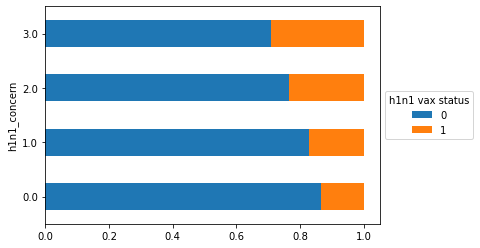

In [13]:
#Calculating percentages for vaccine status by each category of h1n1_concerns and graphing them

#Calculating the sum of each row from the df above
concern_count_total = concern_counts.sum(axis=1)

#Calculating percentage values for each combination by diving number of actual by total per row
concern_precents = concern_counts.divide(concern_count_total, axis=0)

#Graphing percents
ax = concern_precents.plot.barh(stacked=True)
ax.legend(title='h1n1 vax status', loc='center left', bbox_to_anchor=(1, 0.5))

In [14]:
df.drop(columns='h1n1_vaccine').columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


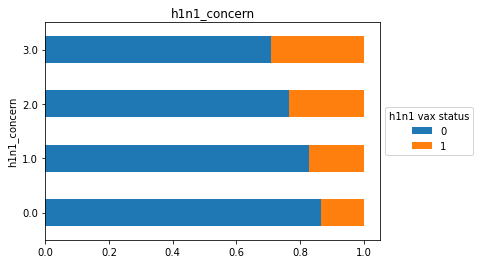

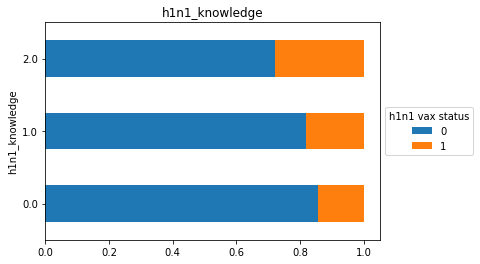

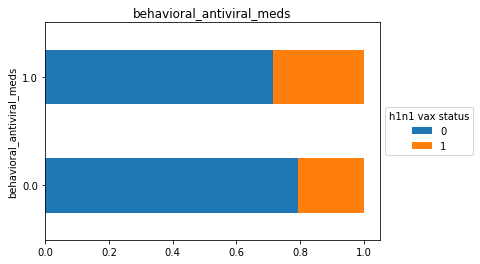

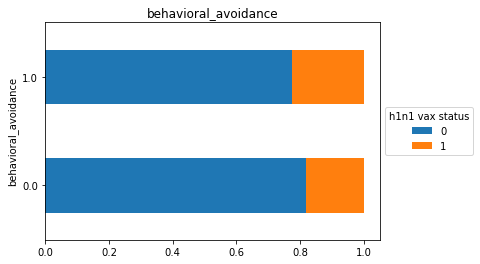

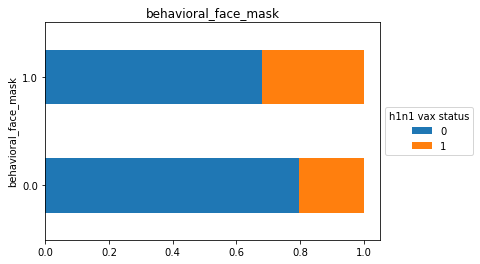

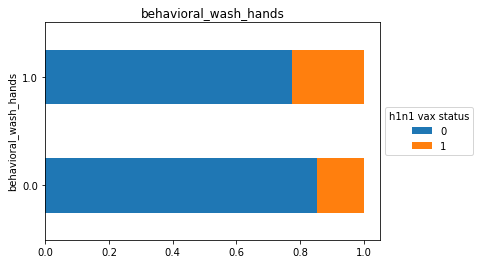

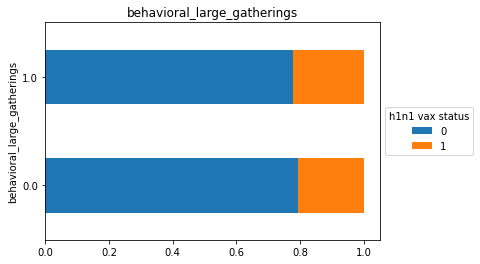

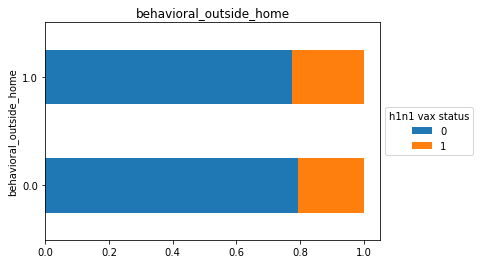

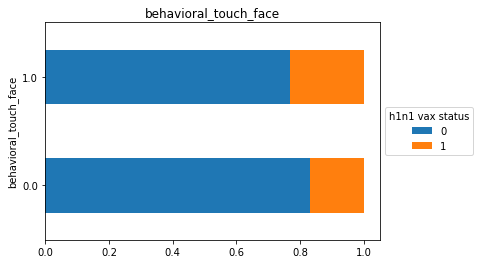

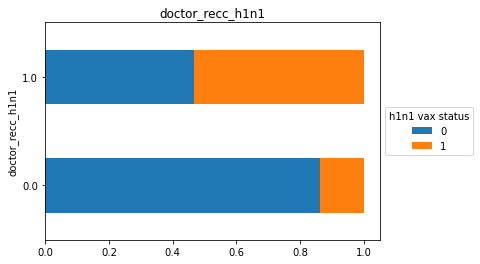

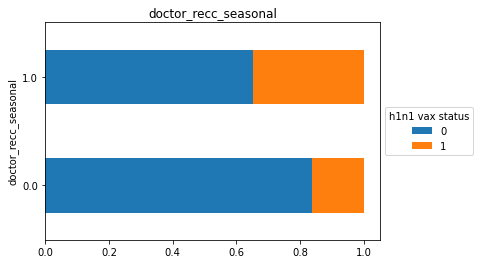

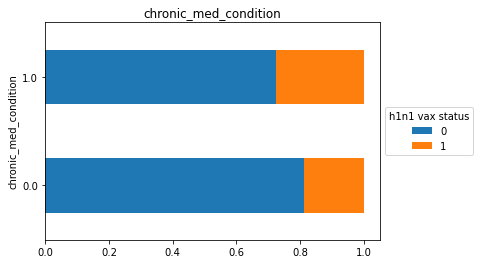

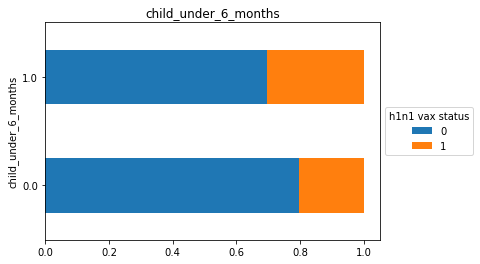

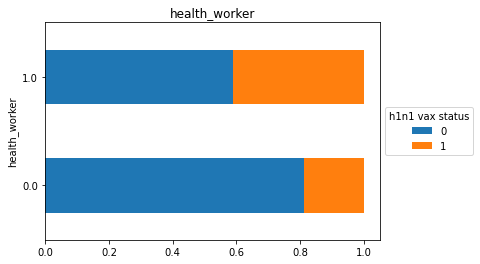

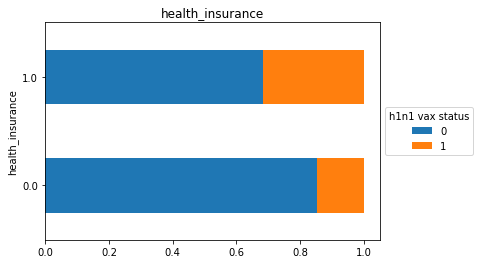

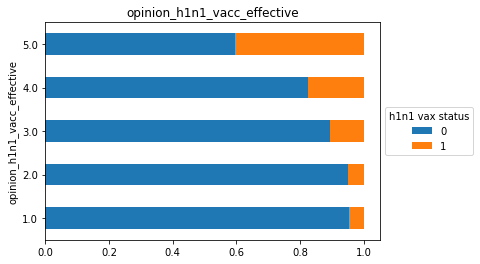

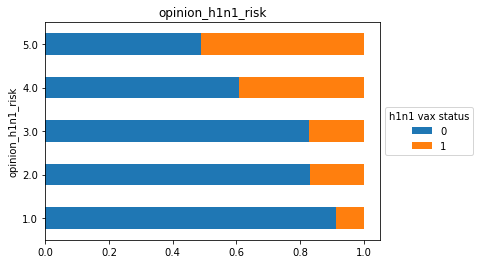

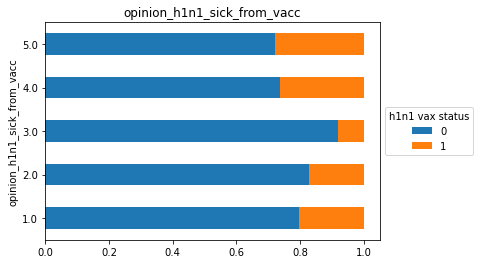

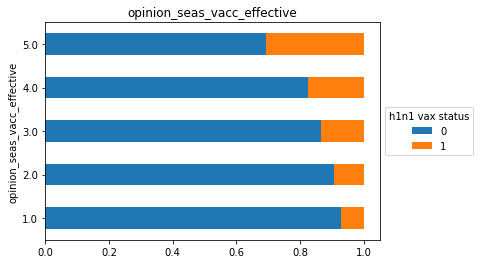

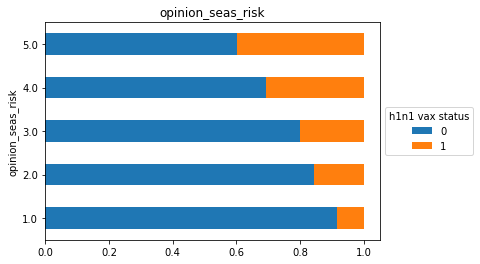

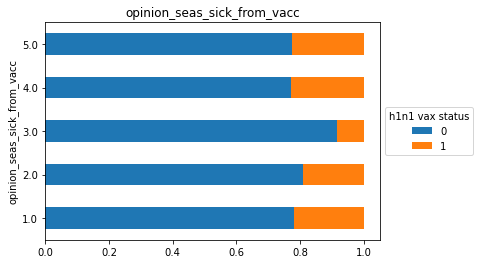

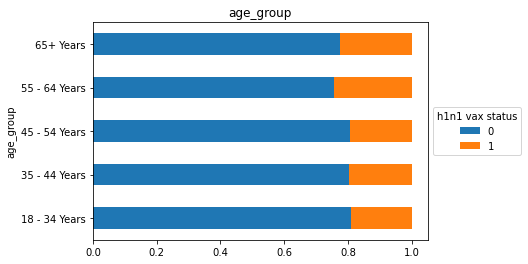

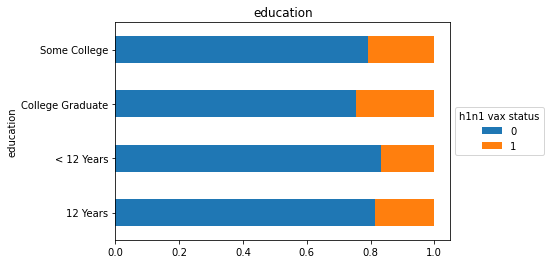

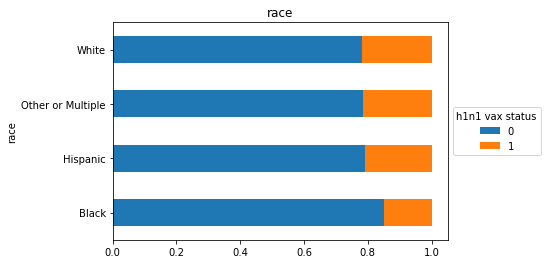

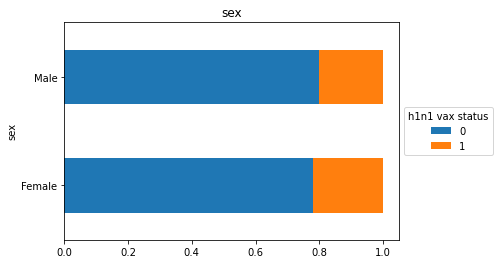

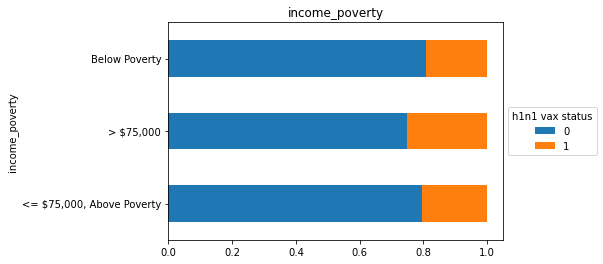

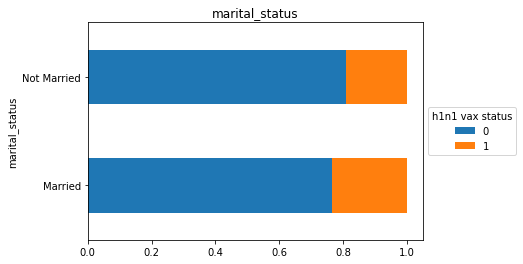

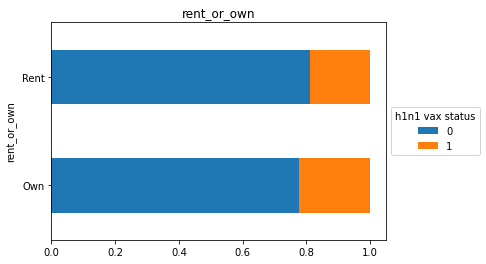

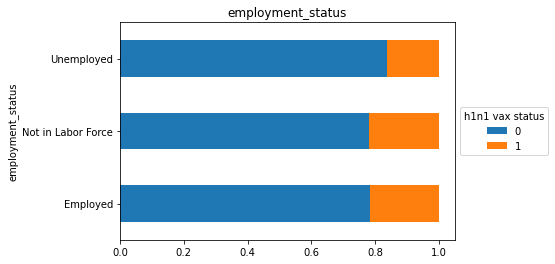

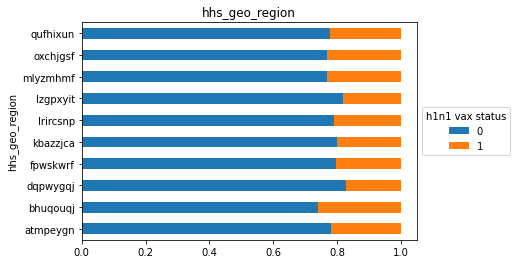

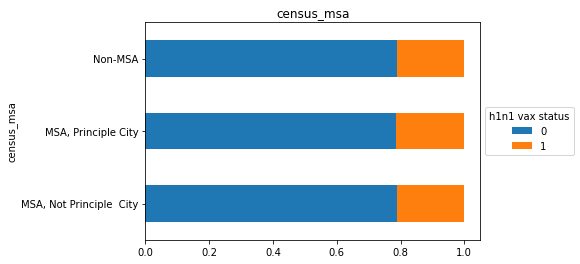

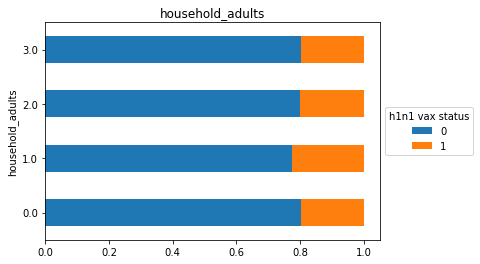

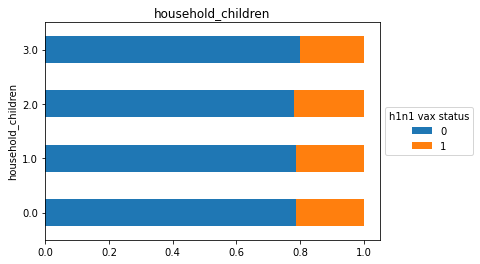

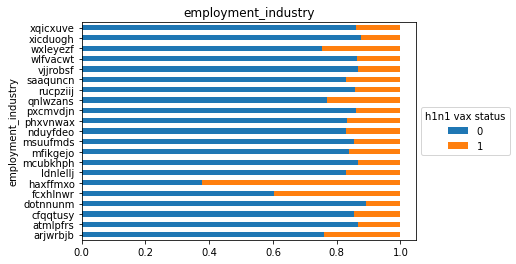

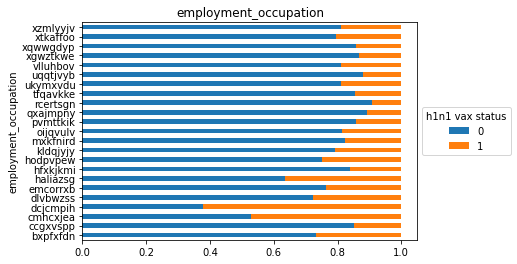

In [15]:
#Creating percentage plots for all of the numeric features
plotting_cols = df.drop(columns='h1n1_vaccine').columns

for col in plotting_cols:
    counts = (df[[col, 'h1n1_vaccine']]
              .groupby([col, 'h1n1_vaccine'])
              .size()
              .unstack('h1n1_vaccine'))
    counts_total = counts.sum(axis=1)
    percents = counts.divide(counts_total, axis=0)
    
    #Graphing percents
    ax = percents.plot.barh(stacked=True)
    ax.set_title(col)
    ax.legend(title='h1n1 vax status', loc='center left', bbox_to_anchor=(1, 0.5))
    

Based on the vaccination rates visualized above, it seems that the majority of features have some sort of realtionship with H1N1 vaccine status, the features that **do not** seem to have a realtionship are:

* behavioral_large_gatherings
* behavioral_outside_home
* sex
* census_msa
* household_children

# Preproccessing Data 



### Identifying and Dealing With Missing Values


In [16]:
#Percent of each column this is missing
df.isna().sum() / len(features_df) * 100


h1n1_concern                    0.344479
h1n1_knowledge                  0.434343
behavioral_antiviral_meds       0.265848
behavioral_avoidance            0.778822
behavioral_face_mask            0.071142
behavioral_wash_hands           0.157262
behavioral_large_gatherings     0.325757
behavioral_outside_home         0.307036
behavioral_touch_face           0.479275
doctor_recc_h1n1                8.087767
doctor_recc_seasonal            8.087767
chronic_med_condition           3.635751
child_under_6_months            3.070356
health_worker                   3.010447
health_insurance               45.957989
opinion_h1n1_vacc_effective     1.464036
opinion_h1n1_risk               1.452803
opinion_h1n1_sick_from_vacc     1.479013
opinion_seas_vacc_effective     1.729884
opinion_seas_risk               1.924589
opinion_seas_sick_from_vacc     2.010709
age_group                       0.000000
education                       5.268282
race                            0.000000
sex             

About half of the data is missing in the 'health_insurance', 'employment_industry', 'employment_occupation' columns so these will be dropped.

In [17]:
#Dropping colunmns with about half of values missing
df.drop(columns=['health_insurance', 'employment_industry', 'employment_occupation'], axis=1, inplace=True)
df.shape

(26707, 33)

### Create dummies for object datatype columns

In [18]:
df.shape

(26707, 33)

In [19]:
df.dtypes

h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                             object
income_poverty                  object
marital_status           

In [20]:
df_ohe = pd.get_dummies(df)
df_ohe

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0,0,0,0,0,1,0,0,0,1
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,1,0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,0,0,0,0,0,0,1,1,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,1,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,1
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0,0,0,1,0,0,0,0,1,0
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0,0,0,1,0,0,0,1,0,0


In [21]:
#Remving '[', ']', '<' from column names for XGBoost
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)

df_ohe.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in df_ohe.columns.values]


## Split the data for model training


In [22]:
y = df_ohe['h1n1_vaccine']
X = df_ohe.drop(columns='h1n1_vaccine', axis=1)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.25, random_state=42)

## Standardizing data Scale

Since some of the data is binary and some of it is not, the scales are different among features and therefore should be scaled prior to training the model


In [27]:
# Instantiate StandardScaler
scaler = StandardScaler()

# Fit and transform the training and test sets
scaled_train = scaler.fit_transform(X_train)
scaled_test = scaler.transform(X_test)

# Convert into a DataFrame
scaled_df_train = pd.DataFrame(scaled_train, columns=X_train.columns)
scaled_df_train.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA
0,-0.680915,-0.429587,-0.22678,-1.620431,-0.274128,-2.159635,-0.746693,-0.714422,-1.438997,NaN,...,-0.372966,-0.348929,-0.291933,-0.435073,-0.300607,2.868870,-0.363877,-0.876462,-0.645018,1.637057
1,0.418851,-0.429587,-0.22678,0.617120,-0.274128,0.463041,-0.746693,-0.714422,-1.438997,-0.533616,...,-0.372966,-0.348929,-0.291933,2.298464,-0.300607,-0.348569,-0.363877,1.140951,-0.645018,-0.610852
2,-1.780681,-2.049716,-0.22678,-1.620431,-0.274128,-2.159635,-0.746693,-0.714422,-1.438997,-0.533616,...,-0.372966,2.865908,-0.291933,-0.435073,-0.300607,-0.348569,-0.363877,-0.876462,1.550345,-0.610852
3,-0.680915,-0.429587,-0.22678,-1.620431,-0.274128,-2.159635,-0.746693,-0.714422,-1.438997,-0.533616,...,-0.372966,-0.348929,-0.291933,-0.435073,3.326600,-0.348569,-0.363877,1.140951,-0.645018,-0.610852
4,0.418851,-0.429587,4.40956,0.617120,-0.274128,0.463041,1.339239,1.399733,0.694928,1.874005,...,-0.372966,-0.348929,-0.291933,-0.435073,-0.300607,-0.348569,-0.363877,1.140951,-0.645018,-0.610852


## Imputing missing data 

There are still a number of missing values within the data, these will be removed via imputing by the median

In [60]:
#filling in remaining NAs
imputer = SimpleImputer(strategy='most_frequent')

# Fit and transform the training and test sets
imputed_train = imputer.fit_transform(scaled_df_train)
imputed_test = imputer.transform(scaled_test)

# Convert into a DataFrame
imputed_df_train = pd.DataFrame(imputed_train, columns=X_train.columns)

#total number of NAs in whole dataset
imputed_df_train

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA
0,-0.680915,-0.429587,-0.22678,-1.620431,-0.274128,-2.159635,-0.746693,-0.714422,-1.438997,-0.533616,...,-0.372966,-0.348929,-0.291933,-0.435073,-0.300607,2.868870,-0.363877,-0.876462,-0.645018,1.637057
1,0.418851,-0.429587,-0.22678,0.617120,-0.274128,0.463041,-0.746693,-0.714422,-1.438997,-0.533616,...,-0.372966,-0.348929,-0.291933,2.298464,-0.300607,-0.348569,-0.363877,1.140951,-0.645018,-0.610852
2,-1.780681,-2.049716,-0.22678,-1.620431,-0.274128,-2.159635,-0.746693,-0.714422,-1.438997,-0.533616,...,-0.372966,2.865908,-0.291933,-0.435073,-0.300607,-0.348569,-0.363877,-0.876462,1.550345,-0.610852
3,-0.680915,-0.429587,-0.22678,-1.620431,-0.274128,-2.159635,-0.746693,-0.714422,-1.438997,-0.533616,...,-0.372966,-0.348929,-0.291933,-0.435073,3.326600,-0.348569,-0.363877,1.140951,-0.645018,-0.610852
4,0.418851,-0.429587,4.40956,0.617120,-0.274128,0.463041,1.339239,1.399733,0.694928,1.874005,...,-0.372966,-0.348929,-0.291933,-0.435073,-0.300607,-0.348569,-0.363877,1.140951,-0.645018,-0.610852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20025,0.418851,-0.429587,-0.22678,-1.620431,-0.274128,0.463041,-0.746693,-0.714422,0.694928,-0.533616,...,-0.372966,-0.348929,-0.291933,-0.435073,-0.300607,-0.348569,2.748185,-0.876462,1.550345,-0.610852
20026,-0.680915,-0.429587,-0.22678,-1.620431,-0.274128,0.463041,-0.746693,-0.714422,0.694928,-0.533616,...,-0.372966,-0.348929,-0.291933,-0.435073,3.326600,-0.348569,-0.363877,-0.876462,1.550345,-0.610852
20027,0.418851,-0.429587,-0.22678,0.617120,-0.274128,-2.159635,-0.746693,-0.714422,0.694928,-0.533616,...,-0.372966,-0.348929,-0.291933,-0.435073,-0.300607,-0.348569,2.748185,-0.876462,-0.645018,1.637057
20028,0.418851,-0.429587,-0.22678,0.617120,-0.274128,0.463041,-0.746693,-0.714422,0.694928,1.874005,...,-0.372966,2.865908,-0.291933,-0.435073,-0.300607,-0.348569,-0.363877,-0.876462,1.550345,-0.610852


In [ ]:
#Building algorithm to fill in missing data 


## Train a baseline Random Forest Model


In [61]:
X_train_final = imputed_df_train
X_test_final = imputed_test


In [62]:
# Instantiate and fit a RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, max_depth=5)
forest_clf.fit(X_train_final, y_train)

# Training accuracy score
print('The Accuracy of the Model on the Training set it:', forest_clf.score(X_train, y_train))

# Test accuracy score
print('The Accuracy of the Model on the Training set it:', forest_clf.score(X_test, y_test))

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

## Train a baseline KNN model


In [95]:
# Instantiate KNeighborsClassifier
clf = KNeighborsClassifier()

# Fit the classifier
clf.fit(None, y_train)

# Print the accuracy on test set
clf.score(None, y_test)

ValueError: Expected 2D array, got scalar array instead:
array=None.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

# Building Pipelines
### Random Forest Pipeline


In [23]:
pipeline_rf1 = Pipeline([('ss', StandardScaler()),
                       ('imp', SimpleImputer(strategy='most_frequent')),
                       ('RF', RandomForestClassifier())])


In [24]:
pipeline_rf1.fit(X_train, y_train)
print('score:',pipeline_rf1.score(X_test, y_test))

mean_rf_cv_score = cross_val_score(pipeline_rf1, X_train, y_train, cv=3).mean()
mean_rf_cv_score

score: 0.8364534970795268


0.8322017738891776

In [80]:
pipeline_rf1.score(X_train, y_train)

0.9999500748876685

### Random Forest gridsearch 1

In [81]:
# Define the grid for GridSearchCV
grid_rf1 = [{'RF__max_depth': [4, 8, 10, 15], 
         'RF__min_samples_split': [2, 5, 10], 
         'RF__min_samples_leaf': [1, 3, 5]}]

# Define a grid search
gridsearch = GridSearchCV(pipeline_1,
                          param_grid=grid_rf1,
                          scoring='accuracy',
                          cv=5,
                         return_train_score=True)

# Fit the training data
gridsearch.fit(X_train, y_train)

# Print the accuracy on test set
gridsearch.score(X_test, y_test)

0.8389995506964205

In [83]:
#Examine best Params of model

# Mean training score
gridsearch_training_score = np.mean(gridsearch.cv_results_["mean_train_score"])

# Mean test score
gridsearch_testing_score = gridsearch.score(X_test, y_test)

print(f"Mean Training Score: {gridsearch_training_score :.2%}")
print(f"Mean Test Score: {gridsearch_testing_score :.2%}")
print("Best Parameter Combination Found During Grid Search:")
gridsearch.best_params_

Mean Training Score: 85.27%
Mean Test Score: 83.90%
Best Parameter Combination Found During Grid Search:


{'RF__max_depth': 15, 'RF__min_samples_leaf': 1, 'RF__min_samples_split': 2}

### Random Forest gridsearch 2

In [86]:
# Define the grid for GridSearchCV
grid_rf2 = [{'RF__max_depth': [15 ,20, 22], 
         'RF__min_samples_split': [2, 5, 10, 14], 
         'RF__min_samples_leaf': [1, 3, 5, ]}]

# Define a grid search
gridsearch2 = GridSearchCV(pipeline_1,
                          param_grid=grid_rf2,
                          scoring='accuracy',
                          cv=5,
                         return_train_score=True)

# Fit the training data
gridsearch2.fit(X_train, y_train)

#Examine best Params of model

# Mean training score
gridsearch_training_score = np.mean(gridsearch.cv_results_["mean_train_score"])

# Mean test score
gridsearch_testing_score = gridsearch.score(X_test, y_test)

print(f"Mean Training Score: {gridsearch_training_score :.2%}")
print(f"Mean Test Score: {gridsearch_testing_score :.2%}")
print("Best Parameter Combination Found During Grid Search:")
gridsearch.best_params_

Mean Training Score: 90.85%
Mean Test Score: 83.72%
Best Parameter Combination Found During Grid Search:


{'RF__max_depth': 15, 'RF__min_samples_leaf': 1, 'RF__min_samples_split': 10}

### Random Forest gridsearch 3

In [94]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'RF__n_estimators': n_estimators,
               'RF__max_features': max_features,
               'RF__max_depth': max_depth,
               'RF__min_samples_split': min_samples_split,
               'RF__min_samples_leaf': min_samples_leaf,
               'RF__bootstrap': bootstrap}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(pipeline_rf1, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1, return_train_score=True)
# Fit the random search model
rf_random.fit(X_train, y_train)



Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 19.0min finished


Mean Training Score: 90.85%
Mean Test Score: 83.72%
Best Parameter Combination Found During Grid Search:


{'RF__max_depth': 15, 'RF__min_samples_leaf': 1, 'RF__min_samples_split': 10}

In [113]:
# Mean training score
gridsearch_training_score = np.mean(rf_random.cv_results_["mean_train_score"])

# Mean test score
gridsearch_testing_score = rf_random.score(X_test, y_test)

print(f"Mean Training Score: {gridsearch_training_score :.2%}")
print(f"Mean Test Score: {gridsearch_testing_score :.2%}")
print("Best Parameter Combination Found During Grid Search:")
rf_random.best_params_

Mean Training Score: 93.49%
Mean Test Score: 83.83%
Best Parameter Combination Found During Grid Search:


{'RF__n_estimators': 400,
 'RF__min_samples_split': 10,
 'RF__min_samples_leaf': 2,
 'RF__max_features': 'auto',
 'RF__max_depth': 40,
 'RF__bootstrap': False}

In [114]:
pipeline_rf_final = Pipeline([('ss', StandardScaler()),
                       ('imp', SimpleImputer(strategy='most_frequent')),
                       ('RF', RandomForestClassifier(n_estimators= 400,
                                                     min_samples_split=10,
                                                     max_depth=40,
                                                     min_samples_leaf=2,
                                                     max_features='auto',
                                                    bootstrap=False))])

pipeline_rf_final.fit(X_train, y_train)

print('Training score:', pipeline_rf_final.score(X_train, y_train))
print('Testing score:', pipeline_rf_final.score(X_test, y_test))

Training score: 0.9470294558162756
Testing score: 0.8361539613598922


In [118]:
rf_train_preds = pipeline_rf_final.predict(X_train)
rf_test_preds = pipeline_rf_final.predict(X_test)

print('Training roc auc score:', roc_auc_score(y_train, rf_preds))
print('Test roc aucScore:', roc_auc_score(y_test, rf_test_preds))

Training roc auc score: 0.8787261249837127
Test roc aucScore: 0.6706894284771286


## KNearestNeighbor Pipeline

In [109]:
pipeline_knn1 = Pipeline([('ss', StandardScaler()),
                       ('imp', SimpleImputer(strategy='most_frequent')),
                       ('knn', KNeighborsClassifier())])
pipeline_knn1.fit(X_train, y_train)

print('Training score:', pipeline_knn1.score(X_train, y_train))
print('Test Score:', pipeline_knn1.score(X_test, y_test))

Training score: 0.8509735396904643
Test Score: 0.8015575857420998


In [110]:
grid_knn1 = {'knn__n_neighbors' : [5,7,9,11,13,15],
               'knn__weights' : ['uniform','distance'],
               'knn__metric' : ['minkowski','euclidean','manhattan']}

gs_knn1 = GridSearchCV(pipeline_knn1, grid_knn1, verbose = 1, cv=3, n_jobs = -1, return_train_score=True)

gs_knn1.fit(X_train, y_train)

print('Training score:', gs_knn1.score(X_train, y_train))
print('Testing score:', gs_knn1.score(X_test, y_test))
print("Best Parameter Combination Found During Grid Search:")
gs_knn1.best_params_

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:  7.7min finished


Training score: 0.8325511732401398
Testing score: 0.815935300284559
Best Parameter Combination Found During Grid Search:


{'RF__max_depth': 15, 'RF__min_samples_leaf': 1, 'RF__min_samples_split': 10}

In [112]:
pipeline_knn2 = Pipeline([('ss', StandardScaler()),
                       ('imp', SimpleImputer(strategy='most_frequent')),
                       ('knn', KNeighborsClassifier(metric= 'manhattan',
                                                   n_neighbors = 11,
                                                   weights='uniform'))])
pipeline_knn2.fit(X_train, y_train)

print('Training score:', pipeline_knn2.score(X_train, y_train))
print('Test Score:', pipeline_knn2.score(X_test, y_test))

Training score: 0.8325511732401398
Test Score: 0.815935300284559


In [ ]:
pipeline_knn2

## XGBoost Pipeline

In [141]:

pipeline_xgb1 = Pipeline([('ss', StandardScaler()),
                       ('imp', SimpleImputer(strategy='most_frequent')),
                       ('xgb', XGBClassifier())])

pipeline_xgb1.fit(X_train, y_train)

# Predict on training and test sets
xgb1_training_preds = pipeline_xgb1.predict(X_train)
xgb1_test_preds = pipeline_xgb1.predict(X_test)

# Accuracy of training and test sets
training_accuracy = accuracy_score(y_train, xgb1_training_preds)
test_accuracy = accuracy_score(y_test, xgb1_test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Training Accuracy: 92.54%
Validation accuracy: 83.48%


### XGBoost pipeline gridsearch

In [163]:
xgb_grid = {
    'xgb__learning_rate': [0.05 ,0.1, 0.2],
    'xgb__max_depth': [3,4,5],
    'xgb__min_child_weight': [2, 3 ,4],
    'xgb__subsample': [ 0.7, 0.8],
    'xgb__n_estimators': [100],
    'xgb__scale_pos_weight' : [1],
    'xgb__weights' : [1, 25, 50, 75, 100]

}

xgb_grid = GridSearchCV(pipeline_xgb1,
                        xgb_grid,
                        scoring='accuracy',
                        cv=3, n_jobs=-1,
                        verbose = 1,
                        return_train_score=True)


xgb_grid.fit(X_train, y_train)

best_parameters = xgb_grid.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = xgb_grid.predict(X_train)
test_preds = xgb_grid.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Fitting 3 folds for each of 270 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed: 11.7min finished


[15:06:53] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { weights } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Grid Search found the following optimal parameters: 
xgb__learning_rate: 0.1
xgb__max_depth: 4
xgb__min_child_weight: 3
xgb__n_estimators: 100
xgb__scale_pos_weight: 1
xgb__subsample: 0.8
xgb__weights: 1

Training Accuracy: 85.1%
Validation accuracy: 84.06%


In [69]:
pipeline_xgb2 = Pipeline([('ss', StandardScaler()),
                       ('imp', SimpleImputer(strategy='most_frequent')),
                       ('xgb', XGBClassifier(learning_rate=0.1,
                                             max_depth=4,
                                             min_child_weight=3,
                                             n_estimators=100,
                                             scale_pos_weight=1,
                                             subsample=0.8,
                                             weights=1))])

pipeline_xgb2.fit(X_train, y_train)

# Predict on training and test sets
xgb1_training_preds = pipeline_xgb2.predict(X_train)
xgb1_test_preds = pipeline_xgb2.predict(X_test)

# Accuracy of training and test sets
training_accuracy = accuracy_score(y_train, xgb1_training_preds)
test_accuracy = accuracy_score(y_test, xgb1_test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

[19:52:49] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { weights } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Training Accuracy: 85.1%
Validation accuracy: 84.06%


In [165]:
xgb_grid2 = {
 'xgb__gamma':[i/10.0 for i in range(0,5)]
}

xgb_grid2 = GridSearchCV(pipeline_xgb2,
                        xgb_grid2,
                        scoring='accuracy',
                        cv=3, n_jobs=-1,
                        verbose = 1,
                        return_train_score=True)


xgb_grid2.fit(X_train, y_train)

best_parameters = xgb_grid2.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = xgb_grid2.predict(X_train)
test_preds = xgb_grid2.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))



Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   18.6s finished


[15:09:10] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { weights } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Grid Search found the following optimal parameters: 
xgb__gamma: 0.0

Training Accuracy: 85.1%
Validation accuracy: 84.06%


In [166]:
xgb_grid3 = {
 'xgb__colsample_bytree':[.88, .89, .90,.91,92],
    'xgb__reg_alpha':[0.03, 0.07, 0.05]
}

xgb_grid3 = GridSearchCV(pipeline_xgb2,
                        xgb_grid3,
                        scoring='accuracy',
                        cv=3, n_jobs=-1,
                        verbose = 1,
                        return_train_score=True)


xgb_grid3.fit(X_train, y_train)

best_parameters = xgb_grid3.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = xgb_grid3.predict(X_train)
test_preds = xgb_grid3.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))



Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   42.4s finished


[15:10:13] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { weights } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Grid Search found the following optimal parameters: 
xgb__colsample_bytree: 0.9
xgb__reg_alpha: 0.05

Training Accuracy: 84.96%
Validation accuracy: 84.03%


In [67]:
pipeline_xgb_final = Pipeline([('ss', StandardScaler()),
                       ('imp', SimpleImputer(strategy='most_frequent')),
                       ('xgb', XGBClassifier(learning_rate=0.1,
                                             max_depth=4,
                                             min_child_weight=3,
                                             n_estimators=100,
                                             scale_pos_weight=1,
                                             subsample=0.8,
                                             weights='balanced',
                                             gamma=0.0))])

pipeline_xgb_final.fit(X_train, y_train)

[19:50:44] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { weights } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




Pipeline(steps=[('ss', StandardScaler()),
                ('imp', SimpleImputer(strategy='most_frequent')),
                ('xgb',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0.0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.1,
                               max_delta_step=0, max_depth=4,
                               min_child_weight=3, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=0, num_parallel_tree=1, random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=0.8, tree_method='exact',
                               validate_parameters=1, verbosity=None,
                              

# Model Comparison


### Feature Importance

In [62]:
# Get the names of each feature
feature_names = list(X.columns)

# Get the coefficients of each feature
coefs = pipeline_xgb_final.steps[2][1].feature_importances_


# Zip coefficients and names together and make a DataFrame
zipped = zip(feature_names, coefs)
feat_imp_df = pd.DataFrame(zipped, columns=["feature", "value"])
# Sort the features by the absolute value of their coefficient
feat_imp_df["abs_value"] = feat_imp_df["value"].apply(lambda x: abs(x))
feat_imp_df = feat_imp_df.sort_values("abs_value", ascending=False)


Text(0.5, 0, 'Feature Name')

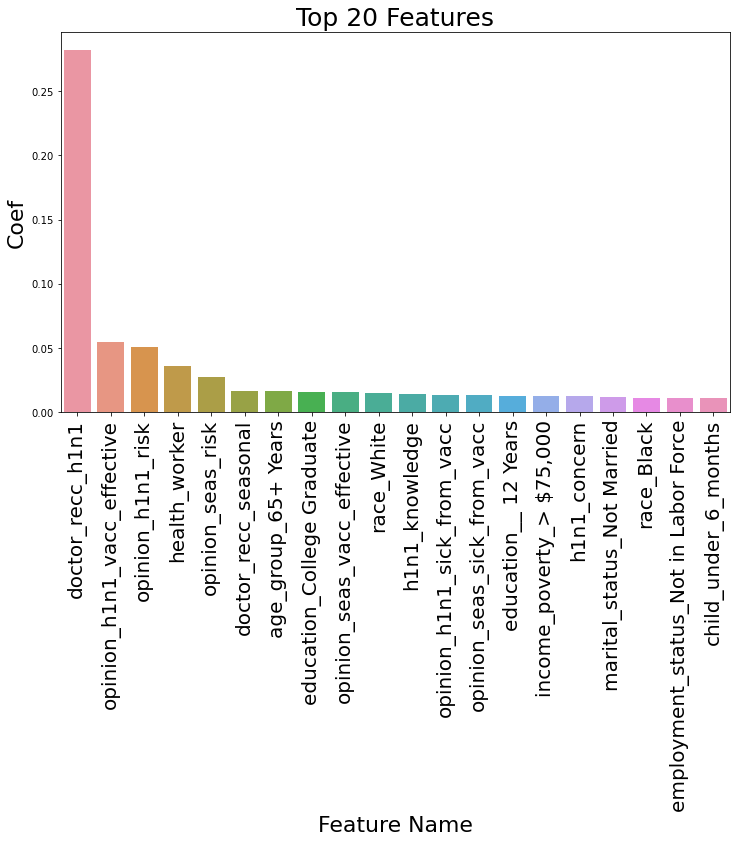

In [63]:
import seaborn as sns
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
sns.barplot(x="feature",
            y="value",
            data=feat_imp_df.head(20))

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=20)
ax.set_title("Top 20 Features", fontsize=25)
ax.set_ylabel("Coef", fontsize=22)
ax.set_xlabel("Feature Name", fontsize=22)

In [66]:
def make_confusion_matrix(model):
    #Make Predictions for model
    preds = model.predict(X_test)
    
    #Build Confusion Matrix and Classification report
    print(confusion_matrix(y_test, preds))
    print(classification_report(y_test, preds))
    
make_confusion_matrix(pipeline_xgb_final)

[[4973  287]
 [ 777  640]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      5260
           1       0.69      0.45      0.55      1417

    accuracy                           0.84      6677
   macro avg       0.78      0.70      0.72      6677
weighted avg       0.83      0.84      0.83      6677

